##합성곱 /플링 계층 구현 실습

풀링 pooling 피처맵을 대표하는 값으로 sub sampling 대표값을 취함 
합성곱층이랑 풀링을 비교하면

합성곱은 가중치와 편향학습을 학습 - 풀링은 단순계산
컬러채널 없음 - 독립연산

***풀링은 전역적 특징을 찾아낼 수 있게 도와줌. 파라미터 숫자를 줄여 계산비용 감소 오버피팅도 억제!


![alt text](image-2.png)
![alt text](image-3.png)
![alt text](image-4.png)

## 실습 - simple_convent.py 작성 > 여기서 SimpleConvNet import

파일 내에서 한번 봐야할 부분~ 코드를 다 칠필욘 없고 구성에 대한 이해만!
![alt text](image-5.png)
![alt text](image-6.png)
![alt text](image-7.png)
![alt text](image-8.png)




In [3]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# [1] 현재 노트북 폴더의 절대 경로를 기준으로 합니다.
current_dir = os.getcwd() 

# [2] 'DL-Excersize' (최상위 루트) 경로를 계산합니다.
# (ch06 -> DL3... -> notebooks -> DL-Excersize)
# os.path.join을 사용하여 세 번 상위 폴더로 이동합니다.
project_root = os.path.abspath(os.path.join(current_dir, '..', '..', '..', '..'))

# [3] 최상위 경로를 sys.path에 추가하여 'dataset'과 'common' 폴더를 찾게 합니다.
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"프로젝트 루트 경로 추가됨: {project_root}")

# [4] (선택적) 현재 폴더(ch06)를 추가하여 simple_convnet도 찾게 합니다.
if current_dir not in sys.path:
    sys.path.append(current_dir)

# -----------------------------------------------------------

# 이제 파이썬은 project_root 경로에서 'dataset' 폴더를 찾아 들어갑니다.
try:
    from dataset.mnist import load_mnist
    from simple_convnet import SimpleConvNet # 같은 폴더의 파일
    from common.trainer import Trainer 

    print("✅ 모든 모듈 임포트 성공했습니다!")

except ModuleNotFoundError as e:
    print(f"❌ 임포트 실패: {e}")
    print("경로가 꼬였을 수 있으니, 위에 출력된 '프로젝트 루트 경로'를 확인해주세요.")

✅ 모든 모듈 임포트 성공했습니다!


train loss:2.281270385679471
=== epoch:1, train acc:0.186, test acc:0.169 ===
train loss:2.1609534404372917
train loss:1.8523590323603647
train loss:1.8325024681956077
train loss:1.3582331433245056
train loss:0.9198793907293684
train loss:0.8400708626339122
train loss:0.7419010686984018
train loss:0.5610017871451034
train loss:0.9311018376548036
train loss:0.9672234173395092
train loss:0.5339494274131905
train loss:0.4622761029525556
train loss:0.5487598685005826
train loss:0.5411265248583067
train loss:0.5243157904556773
train loss:0.46255377045211227
train loss:0.5286657442119442
train loss:0.34820969587234335
train loss:0.41871020247511814
train loss:0.5486861545901871
train loss:0.5754047867229708
train loss:0.43174703260416947
train loss:0.374141267171634
train loss:0.3121840838316375
train loss:0.25517574391720116
train loss:0.26893958206425694
train loss:0.23696836965306417
train loss:0.21514931621077527
train loss:0.2210580203532755
train loss:0.23846848218996722
train loss:0.1

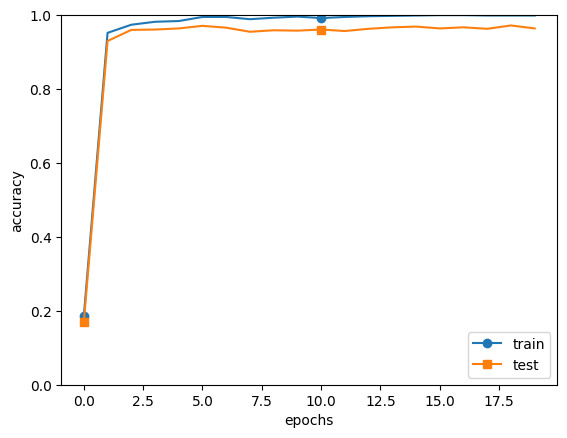

In [10]:
#데이터 읽기

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False) #False 의미?

#시간이 오래 걸릴 경우 데이터를 줄인다 일단 오천개 고
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:5000], t_test[:5000]

max_epochs = 20

# 신경망 모델: 학습시킬 대상인 CNN 모델의 설계도(SimpleConvNet 객체)를 불러오는 역할
network = SimpleConvNet(input_dim=(1,28,28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.01},
                  evaluate_sample_num_per_epoch=1000)
#최적화 기법 결정: 가중치를 갱신하는 방법을 Adam으로 설정합니다.
# Adam은 SGD보다 효율적이고 빠르게 최적의 가중치를 찾도록 도와줍니다.

# 1. 'time' 라이브러리를 먼저 import 해야 합니다.
import time 

# 2. 학습 시작 시간 기록
start_time = time.time()

# 3. 모델 학습 실행 (가장 오래 걸리는 부분)
trainer.train()  #학습 해주세요~~ 라는 의미

# 4. 학습 종료 시간 기록
end_time = time.time()

# 5. 경과 시간 계산 및 출력
elapsed_time = end_time - start_time
print(f"학습에 걸린 시간: {elapsed_time:.2f}초") 
# --- (이후 코드: 정확도 리스트 가져오기, 그래프 그리기) ---

train_acc_list = trainer.train_acc_list # 학습 데이터 정확도 리스트
test_acc_list = trainer.test_acc_list   # 테스트 데이터 정확도 리스트

#매게변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

#그래프 그리기
markers = {'train':'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


